
## **CAP 6615 - Neural Networks -**


---


## **Programming Assignment 1 -- Single-Layer Perceptron**


---


1.   Hang Yin
2.   Harsh Soni
3.   Aaditya Prakash
4.   Xiang Yan
5.   Logan Cundiff







Spring Semester 2021 


---


31 Jan 2021






### **Summary of the single-layer perception model (implemented with Approach 3):**

 *Number of weights*: 65536.

  *Training set*: Ten grayscale 16x16 (pixels) images from a set of 20 images, including A, B, D, E, G, H, I, 3, 5,9

  *Testing set*: Twenty grayscale 16x16 (pixels) images (with and without noise).

  *Output Values*: Twenty grayscale 16x16 images

  *Model Optimizer*: “Adam” - which uses a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

  *Loss function*: “MSE” - Mean Squared Error function



### **Step 1: Design and build the dataset**

Here we load all the packages used in this project

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
from urllib.request import urlopen
import sys
import matplotlib.pyplot as plt
import re
from string import ascii_uppercase
import copy
from sklearn.preprocessing import MinMaxScaler

Here we create the labels for the 20 images

In [3]:
class_names = list(ascii_uppercase)[0:10]+[str(i) for i in range(10)]
class_labels = np.arange(20)
print(class_names)
print(class_labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In the "images" folder, we have stored 20 separate images. We use the cv2 package to resize these images and get 16 * 16 pixels. These pixels have a value between 0 to 255, and so we recode them into 0 and 1 by applying a thresholding function (127.5 is set as the cutoff value). Finally, we convert the image pixels into arrays.

In [4]:
imgs = []
for img_file in class_names: 
    resp = urlopen('https://raw.githubusercontent.com/troyin/image-classification/main/images'+'/'+img_file+'.'+'gif')
    arr = np.asarray(bytearray(resp.read()), dtype="uint8")
    img_gray = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE)
    img_gray = cv2.resize(img_gray, (16, 16)) 
    (thresh, img_bw) = cv2.threshold(img_gray, 127.5, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    img = np.array(img_bw,dtype = np.float64)	
    imgs.append(img)
imgs = np.array(imgs,dtype = np.float64)/255.

Here, we plot the 20 images to make sure that the dataset has been loaded correctly.

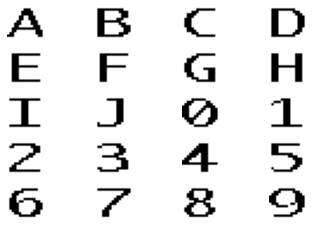

In [5]:
for i in range(imgs.shape[0]):
      plt.subplot(5, 4, i+1)
      plt.imshow(imgs[i],cmap='gray')
      plt.axis('off')

plt.show()

### **Step 2: Design and develop a single-layer perception**

Our team has tried Approach 2 and Approach 3. We will report the results for both. However, we found that Approach 3 provides better results. We report the results for both Approach 2 and 3 here, but we only implement Approach 3 for Step 3 and the subsequent steps.

**Approach #2: Simple Network with Vector Output bold text**

***Neural network architecture***: We build the model with two layers: an input layer and an output layer. The input layer contains 256 nodes, and the output layer has 10 nodes (10 nodes because we have 10 images to be trained). Each of the 10 nodes contains a score that indicates the current image belongs to one of the 10 classes.

1. Set up the layers. The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 16 by 16 pixels) to a one-dimensional array (256 pixels). The second layer, tf.keras.layers.Dense, is a fully connected layer. We have specified a "softmax" activitation here, which allows each node to return a probably indicating the likeliehood that the current image belongs to the corresponding class.

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(16, 16)),
  tf.keras.layers.Dense(10, activation='softmax')
])

2. Compile the model. We specify a loss function that deals with multiple classification problems, an AdamOptimizer (a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments), and an accuracy metric to indicate the faction of the images that are correctly classified.

In [7]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

3. Train the model. We have tested different epochs. We found that the model returns the best result when epochs is around 500.

In [8]:
model.fit(imgs[0:10,:,:], class_labels[0:10], epochs=500, verbose=0)

4. Evaluate accuracy. The following functions show the prediction results of the model and if the predictions are accurate or now. 

  We find that the predictions for all images that are not in the training dataset are wrong. Therefore, we have decided to implement Approach 3 in this project instead.

In [9]:
print(np.argmax(model.predict(imgs), axis=-1))
print(class_labels)
print(np.argmax(model.predict(imgs), axis=-1)==class_labels)

[0 1 2 3 4 5 6 7 8 9 3 8 1 1 0 9 6 5 1 3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False]


**Approach #3: Fully-connected Network with Image Output**

***Neural network architecture***: We build the model with two layers: an input layer and an output layer. The input layer contains 256 nodes, and the output layer has also has 256 nodes (and hence pixels). Each of these pixels contains a score that has a value range between 0 and 1; and together these pixels form the output image.

1. Set up the layers. The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 16 by 16 pixels) to a one-dimensional array (256 pixels). The second layer, tf.keras.layers.Dense, is a fully connected layer. We have specified a "sigmoid" activitation here, which allows each node to return a value between 0 and 1. Finally, the third layor, tf.keras.layers.Reshape, tranforms the format of one-dimensional array (256 pixels) back into the format of an image (16*16 pixels).

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(16, 16)),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Reshape((16, 16))
])

2. Compile the model. We specify a loss function (i.e., mean squared errors) that deals with regression problems, an AdamOptimizer (a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments). Since we do not predict the class for each image, we do not contruct an accuracy matrix here.

In [11]:
model.compile(optimizer='adam',loss='mse',)

We show the training and testing of our model (implemneted with Approach 3) in the next step.

### **Step 3: Train our SLP on the dataset**

3. Following Step 2, we now train the SLP. There are two main considerations: 1) which 10 of the 20 images to use for training; 2) how many epochs to train. After experimenting with differen combinations of the image sets and different numbers of epochs (100, 250, 500, 1000), we achieve the best results with the following: 1) We use A,B,D,E,G,H,I,3,5,9; 2) We use 500 epochs.

In [12]:
model.fit(imgs[[0,1,3,4,6,7,8,13,15,19],:,:], imgs[[0,1,3,4,6,7,8,13,15,19],:,:], epochs=500, verbose=0) # training on 10 images (Assignment Step 3)

### **Step 4. Test the SLP with metrics of Fh and Ffa**

4. Evaluate the model. We do so by plotting the predicted 16*16 pixels as images below. We can see that the letters that were not part of the train set have murky looks: their predictions are often not exactly accurate; however, the predicted shape somewhat remsembles the letter. Among all letters that are in the testing set only, it appears that C, F and J are predicted with the highest accuracy.  

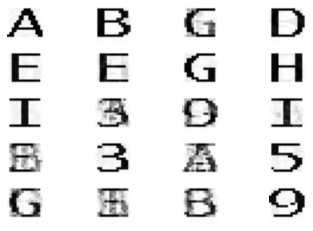

In [13]:
predicted = model.predict(imgs) # prediction with noiseless images (Assignment Step 3)
for i in range(imgs.shape[0]):
      plt.subplot(5, 4, i+1)
      plt.imshow(predicted[i],cmap='gray' )
      plt.axis('off')

plt.show()

We now write two functions to compute the two accuracy metrics: fraction of hits (Fh) and fraction of false alarms (Ffa).

In [14]:
# The following function returns ffa and fh
def compute_ffa_fh(predicted):
  ffa, fh =[], []
  for i in range(len(predicted)):
    predict, img = predicted[i].reshape(256) , imgs[i].reshape(256) # flattening 16x16 to 1x256
    correct, wrong, black_px, white_px = 0,0,0,0                    # for ffa and fh
    for j in range(len(predict)):
      predict[j] = 0 if predict[j] < 0.5 else 1                     # grayscale to binary
    black_px = np.sum(img==1)
    white_px = np.sum(img==0)
    correct = np.sum(np.logical_and(img==1, predict==1))
    wrong = np.sum(np.logical_and(img==0, predict==1))
    ffa.append(wrong/white_px)
    fh.append(correct/black_px)
  return ffa,fh


We graph Fh as a function of Ffa for each exemplar in the input dataset.

Text(0, 0.5, 'Fh')

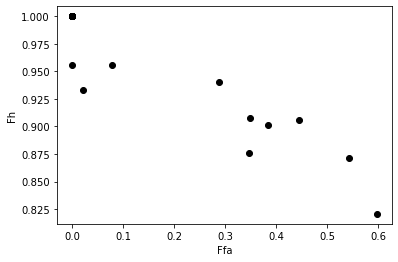

In [15]:
# fh ~ ffa plot for the 

ffa,fh = compute_ffa_fh(predicted)
# std_dev_list = [0]*20
ax = plt.gca()
# ax.scatter(std_dev_list,ffa,facecolors='none',edgecolors='black',)
ax.scatter(ffa,fh,color='black')
ax.set_xlabel('Ffa')
ax.set_ylabel('Fh')

### **Step 5. Perturb the dataset by adding noise**

We first write a function to add noise to the images. The noise will beGaussian-distrited with 10 percent cross-section, with zero mean and a standard deviation to be specified as an input to the function.

In [16]:
def noise_adder(imgs,dev):        
  noise = np.random.normal(0,dev,(16,16))
  indices = np.random.choice(256, replace=False, size=int(256 * 0.9))
  noise.reshape(-1)[indices]=0
  imgs_noise = copy.deepcopy(imgs)
  for i in range(imgs.shape[0]):
    imgs_noise[i,:,:] = imgs_noise[i,:,:] + noise
  imgs_noise_normalized = copy.deepcopy(imgs_noise)
  scaler = MinMaxScaler(copy=True)
  for i in range(imgs_noise.shape[0]):
    scaler.fit(imgs_noise[i])
    imgs_noise_normalized[i] = scaler.transform(imgs_noise[i])
  return imgs_noise_normalized

Here, we specify the standard deviation as 0.1 and visulize how the images look at when noises have been added.

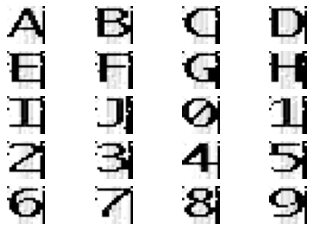

In [17]:
imgs_noise_normalized = noise_adder(imgs,0.1)
for i in range(imgs.shape[0]):
      plt.subplot(5, 4, i+1)
      plt.imshow(imgs_noise_normalized[i],cmap='gray' )
      plt.axis('off')

plt.show()

### **Step 6. Testing on perturbed datasets with different levels of noise**

Define various gaussian noise levels

In [18]:
dev=[0.1,0.05,0.03,0.02,0.01,0.005,0.003,0.002,0.001]

Compute metrics fha and fh changes for each image as noise level increases

Text(0.5, 0, 'Gaussian noise level')

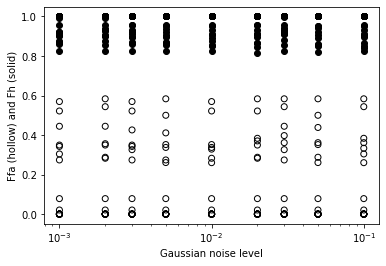

In [19]:
ax = plt.gca() # scatter plot
ax.set_xscale('log')


data =np.array([[0.00]*20]*18) #For tabulating
# print(data.shape)

for i in range(9):
  # dev = dev/10
  imgs_noisy = noise_adder(imgs,dev[i])
  std_dev_list = [dev[i]]*20
  predicted = model.predict(imgs_noisy)
  ffa,fh = compute_ffa_fh(predicted)
  data[i*2] = ffa
  data[i*2+1] = fh
  ax.scatter(std_dev_list,ffa,facecolors='none',edgecolors='black',)
  ax.scatter(std_dev_list,fh,color='black')

ax.set_ylabel('Ffa (hollow) and Fh (solid)')
ax.set_xlabel('Gaussian noise level')

Table of Autoassociative Single Layer Perceptron Response to Noisy Input

In [20]:
row_names = class_names
column_names = []
for i in range(len(dev)):
  column_names.append('stdev -'+str(dev[i])+' Ffa')
  column_names.append('stdev -'+str(dev[i])+' Fh')
df = pd.DataFrame(data=data.T,index=row_names,columns=column_names)
df = df.style.set_properties(**{
    'font-size': '8pt',
})
df

,stdev -0.1 Ffa,stdev -0.1 Fh,stdev -0.05 Ffa,stdev -0.05 Fh,stdev -0.03 Ffa,stdev -0.03 Fh,stdev -0.02 Ffa,stdev -0.02 Fh,stdev -0.01 Ffa,stdev -0.01 Fh,stdev -0.005 Ffa,stdev -0.005 Fh,stdev -0.003 Ffa,stdev -0.003 Fh,stdev -0.002 Ffa,stdev -0.002 Fh,stdev -0.001 Ffa,stdev -0.001 Fh
A,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
B,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
C,0.0208333,0.908654,0.0208333,0.923077,0.0208333,0.927885,0.0208333,0.913462,0.0208333,0.908654,0.0208333,0.923077,0.0208333,0.923077,0.0208333,0.927885,0.0208333,0.908654
D,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
E,0,1,0,1,0,0.994845,0,1,0,1,0,1,0,1,0,0.989691,0,0.989691
F,0,0.955665,0,0.950739,0,0.940887,0,0.955665,0,0.955665,0,0.955665,0,0.955665,0,0.935961,0,0.921182
G,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
H,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
I,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
J,0.304348,0.866667,0.26087,0.852381,0.326087,0.880952,0.282609,0.866667,0.282609,0.87619,0.26087,0.871429,0.326087,0.871429,0.282609,0.87619,0.304348,0.871429


### **Step 7 Discussion**


Here we have trained a single-layer perception by sampling 10 grayscale sub-images from the 20 image data set and making sure all values are binary (black or white).  Once the images were appended into an array, we applied both Approach 2 and 3 two on the training set by utilizing Tensorflow keras.model function that takes in a set input and applies an activation function onto the target output. We found that Approach 2 is incapable of predicting images that are not included in the training set, and so we choose to focus on implementing Approach 3 (fully-conncted network with image output). This model has an input layer with 256 nodes and an output layer with 256 nodes, and so it has 65,536 weights. We have used a sigmoid activation fucntion and applied the Adam Optimization method to adapt the learning rate for training the weights.

Sigmoid function defined as: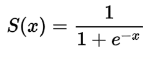
 will return a real number between 0 to 1 on each of our 256 pixel values. The model function also reshapes the output to a 16 by 16 matrix. 
We then utilize the model.compile function with the optimization and loss function parameters. For the optimization function, Adam is applied which uses an estimation of the expected value and the variance (also known as the first and second moments) to adapt the learning rate for each weight in the model function: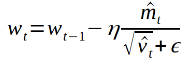

Where w is the weight, n is the number of iterations, m being the first moment, v the second moment, and epsilon is the smallest positive floating point number such that (1 + epsilon) - 1 equals epsilon. The 1st moment or mean and the 2nd moment (variance) is calculated as follows in the Adam optimizer: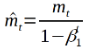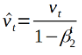 with beta being representative of the two optional bias values. 

The other parameter of our model.compile function is our loss function: MSE which stands for mean squared error. The formula being performed under the hood for this loss function is as follows: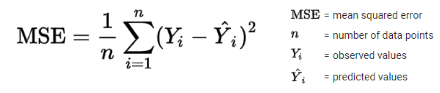 


The loss function minimizes the error on the targeted output by comparing the training sample with the predicted output. Once this is completed, we go onto apply the model.fit function on the model that has been created. 

When training this model, we found that the choice of the training dataset (i.e., the 10 images used for training) and the number of epochs have a significant on the model performance. This is where the amount of epochs is inputted and the model is trained with the provided 10 images of our input. We believed that the most ideal approach to determine the optimal training set would be to develop a function that randonly selects 10 of the 20 images, train a SLP on them, evaluate the accuracy with 20 images, and then choose the training set that has the best performance. This approach would nonetheless require a very long time to implement, and so we choose to select a subset of images that we believe to have most distinctive shapes. Regarding the number of epochs, we experimented with several numbers (100, 250, 500, 750, 1000) and find that 500 produces the best results. In general, as standard deviation increases, it becomes more difficult for SLP to recover images. So as standard deviation increases, Fh decreases and Ffa increases.

A better approach for the future would be to develop a stop function that makes the training pause when out-of-sample prediction accuracy does not improve with an additional epoch. This stop function should also allow us to pocket the weights trained at the previous epoch.


 